In [1]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
rng = np.random.default_rng()

In [29]:
fs = 10e3
N = 1e6
amp = 2 * np.sqrt(2)
noise_power = 0.01 * fs / 2
time = np.arange(N) / float(fs)
mod = 500*np.cos(2*np.pi*0.25*time)
carrier = amp * np.sin(2*np.pi*3e3*time + mod)
noise = rng.normal(scale=np.sqrt(noise_power),
                   size=time.shape)
noise *= np.exp(-time/5)
x = carrier + noise

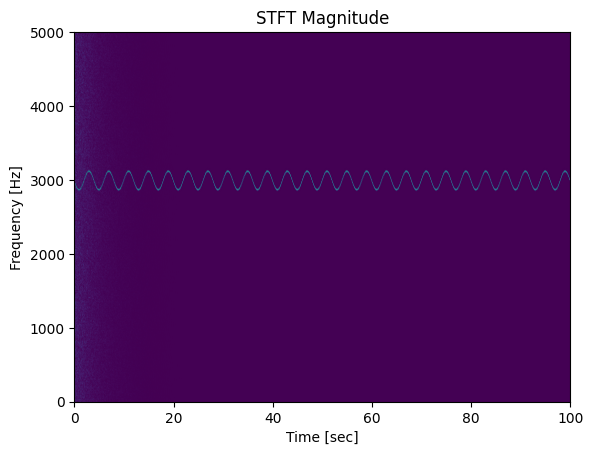

In [30]:
f, t, Zxx = signal.stft(x, fs, nperseg=1000)
plt.pcolormesh(t, f, np.abs(Zxx), vmin=0, vmax=amp, shading='gouraud')
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

In [19]:
print(np.abs(Zxx))

[[0.05167848 0.08314505 0.11601223 ... 0.04605741 0.07727949 0.02852486]
 [0.05135032 0.09446314 0.09156733 ... 0.0437829  0.04897331 0.02519646]
 [0.05966463 0.08623875 0.24247768 ... 0.04209057 0.01181233 0.01957302]
 ...
 [0.14062497 0.19547208 0.28662684 ... 0.05401359 0.01644884 0.02423827]
 [0.10602641 0.19604873 0.25936979 ... 0.05054503 0.03381533 0.02190384]
 [0.08001103 0.05128354 0.26550638 ... 0.05423928 0.0451686  0.00993559]]
